In [1]:
# manual label data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read zipfile
df = pd.read_csv('data/data_selection_17_23.csv')

In [ ]:
df

,timestamp,nodeid,temperature,humidity,voltage,light
0,1468800,1,NaN,NaN,NaN,NaN
1,1468800,2,NaN,NaN,NaN,NaN
2,1468800,3,NaN,NaN,NaN,NaN
3,1468800,4,NaN,NaN,NaN,NaN
4,1468800,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
933115,1987170,50,NaN,NaN,NaN,NaN
933116,1987170,51,NaN,NaN,NaN,NaN
933117,1987170,52,NaN,NaN,NaN,NaN
933118,1987170,53,NaN,NaN,NaN,NaN


In [8]:
# how many days data?
df['timestamp'].nunique()/(3600/30)/24

6.0

<Axes: xlabel='nodeid'>

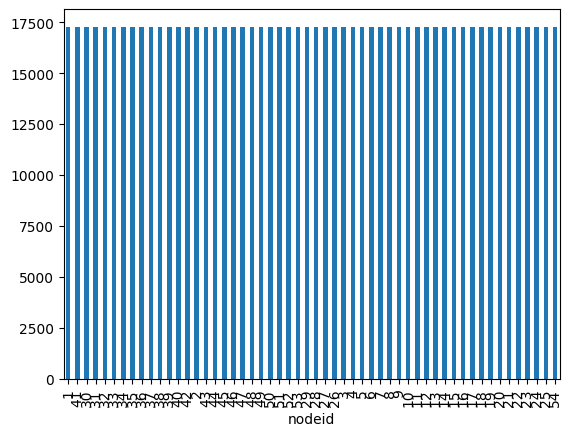

In [11]:
# plot count of data for each node id
df['nodeid'].value_counts().plot(kind='bar')

In [44]:
df_temp=df[:1000]
df_temp

,timestamp,nodeid,temperature,humidity,voltage,light,timestamp1,datetime2
0,1468800,1,NaN,NaN,NaN,NaN,17.00000,1970-01-18 00:00:00
1,1468800,2,NaN,NaN,NaN,NaN,17.00000,1970-01-18 00:00:00
2,1468800,3,NaN,NaN,NaN,NaN,17.00000,1970-01-18 00:00:00
3,1468800,4,NaN,NaN,NaN,NaN,17.00000,1970-01-18 00:00:00
4,1468800,5,NaN,NaN,NaN,NaN,17.00000,1970-01-18 00:00:00
...,...,...,...,...,...,...,...,...
995,1469340,24,NaN,NaN,NaN,NaN,17.00625,1970-01-18 00:09:00
996,1469340,25,NaN,NaN,NaN,NaN,17.00625,1970-01-18 00:09:00
997,1469340,26,NaN,NaN,NaN,NaN,17.00625,1970-01-18 00:09:00
998,1469340,27,NaN,NaN,NaN,NaN,17.00625,1970-01-18 00:09:00


<Axes: xlabel='nodeid'>

<Figure size 3000x1000 with 0 Axes>

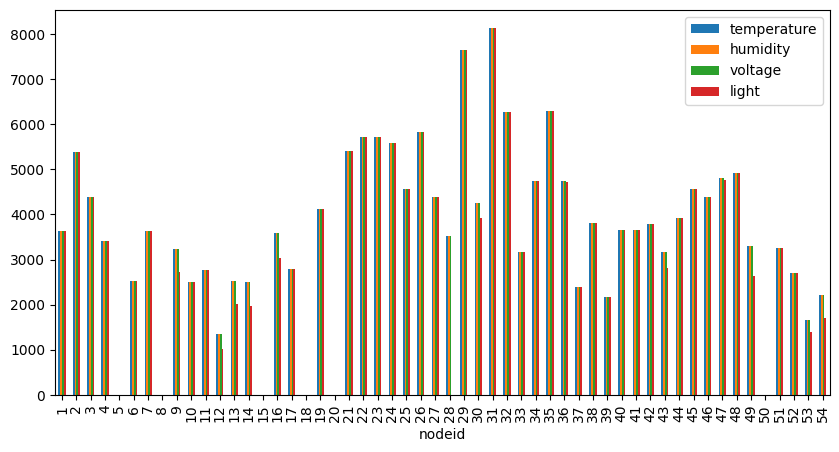

In [60]:
# plot count of the temperature for each node id
# plot figure size
df[['nodeid','temperature','humidity','voltage','light']].groupby('nodeid').count().plot(kind='bar',figsize=(10,5))
# .value_counts().plot(kind='bar')
# plt.ylabel('temperature count')

In [65]:
# select one node and plot the temperature
node = 3
df_node = df[df['nodeid']==node]
df_node['temperature'].head(20)
# print(df_node.shape)
# plt.plot(df_node['timestamp']/(3600)/24, df_node['temperature'])

2      NaN
56     NaN
110    NaN
164    NaN
218    NaN
272    NaN
326    NaN
380    NaN
434    NaN
488    NaN
542    NaN
596    NaN
650    NaN
704    NaN
758    NaN
812    NaN
866    NaN
920    NaN
974    NaN
1028   NaN
Name: temperature, dtype: float64

In [19]:
# change the timestamp 
# make timestamp into float
df['timestamp1'] =df['timestamp']/3600/24

In [35]:
# change the timestamp to datetime
df['datetime2'] = pd.to_datetime(df['timestamp'], unit='s')

In [36]:
df

,timestamp,nodeid,temperature,humidity,voltage,light,timestamp1,datetime2
0,1468800,1,NaN,NaN,NaN,NaN,17.000000,1970-01-18 00:00:00
1,1468800,2,NaN,NaN,NaN,NaN,17.000000,1970-01-18 00:00:00
2,1468800,3,NaN,NaN,NaN,NaN,17.000000,1970-01-18 00:00:00
3,1468800,4,NaN,NaN,NaN,NaN,17.000000,1970-01-18 00:00:00
4,1468800,5,NaN,NaN,NaN,NaN,17.000000,1970-01-18 00:00:00
...,...,...,...,...,...,...,...,...
933115,1987170,50,NaN,NaN,NaN,NaN,22.999653,1970-01-23 23:59:30
933116,1987170,51,NaN,NaN,NaN,NaN,22.999653,1970-01-23 23:59:30
933117,1987170,52,NaN,NaN,NaN,NaN,22.999653,1970-01-23 23:59:30
933118,1987170,53,NaN,NaN,NaN,NaN,22.999653,1970-01-23 23:59:30


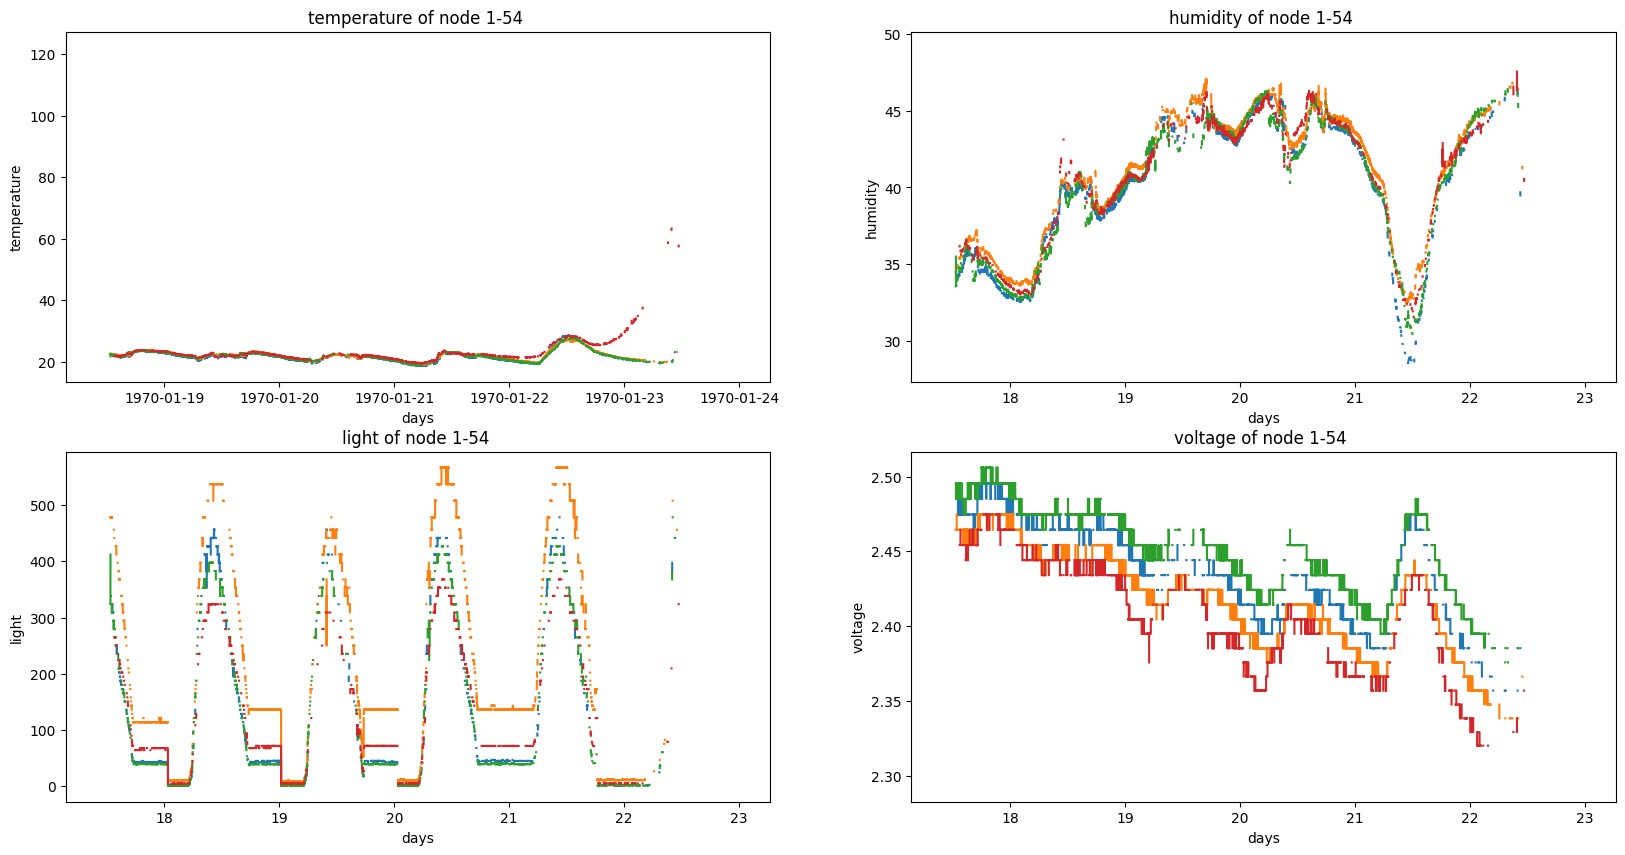

In [38]:
# 4 subplots (2,2)
fig, ax = plt.subplots(2,2, figsize=(20,10))
bad_sensor_list=[5,8,15,18,20,50, 16,17, 35,46,19,6,22,39,32,26] # low voltage
bad_sensor_list=[-1] # low voltage
# plot temperature
for node in range(1,5):
    if node not in bad_sensor_list:
        df_node = df[df['nodeid']==node]
        ax[0,0].plot(df_node['datetime2'], df_node['temperature'])
        ax[0,1].plot(df_node['timestamp1'], df_node['humidity'])    
        ax[1,0].plot(df_node['timestamp1'], df_node['light'])
        ax[1,1].plot(df_node['timestamp1'], df_node['voltage'])
        ax[0,0].set_title(f'temperature of node 1-54 ')
        ax[0,1].set_title(f'humidity of node 1-54 ')
        ax[1,0].set_title(f'light of node 1-54 ')
        ax[1,1].set_title(f'voltage of node 1-54 ')

ax[0,0].set_xlabel('days')
ax[0,0].set_ylabel('temperature')
ax[0,1].set_xlabel('days')
ax[0,1].set_ylabel('humidity')
ax[1,0].set_xlabel('days')
ax[1,0].set_ylabel('light')
ax[1,1].set_xlabel('days')
ax[1,1].set_ylabel('voltage')
    
plt.show()

In [55]:
# which node has the highest temperature?
df_day.groupby('nodeid')['voltage'].min().sort_values(ascending=True)

nodeid
39.0    0.009101
17.0    2.062220
32.0    2.098660
16.0    2.144120
26.0    2.175530
22.0    2.224420
35.0    2.241210
46.0    2.241210
19.0    2.241210
6.0     2.258250
13.0    2.266870
11.0    2.275560
38.0    2.284310
21.0    2.329100
4.0     2.329100
54.0    2.347510
12.0    2.347510
52.0    2.347510
25.0    2.356830
49.0    2.356830
27.0    2.356830
2.0     2.356830
37.0    2.356830
23.0    2.366220
42.0    2.366220
53.0    2.366220
30.0    2.366220
41.0    2.366220
51.0    2.366220
43.0    2.375680
40.0    2.375680
44.0    2.375680
1.0     2.375680
34.0    2.375680
31.0    2.375680
24.0    2.375680
10.0    2.375680
36.0    2.375680
29.0    2.375680
45.0    2.385220
47.0    2.385220
33.0    2.394840
14.0    2.394840
7.0     2.394840
3.0     2.394840
48.0    2.404530
9.0     2.454210
28.0    2.464400
5.0          NaN
8.0          NaN
15.0         NaN
18.0         NaN
20.0         NaN
50.0         NaN
Name: voltage, dtype: float64

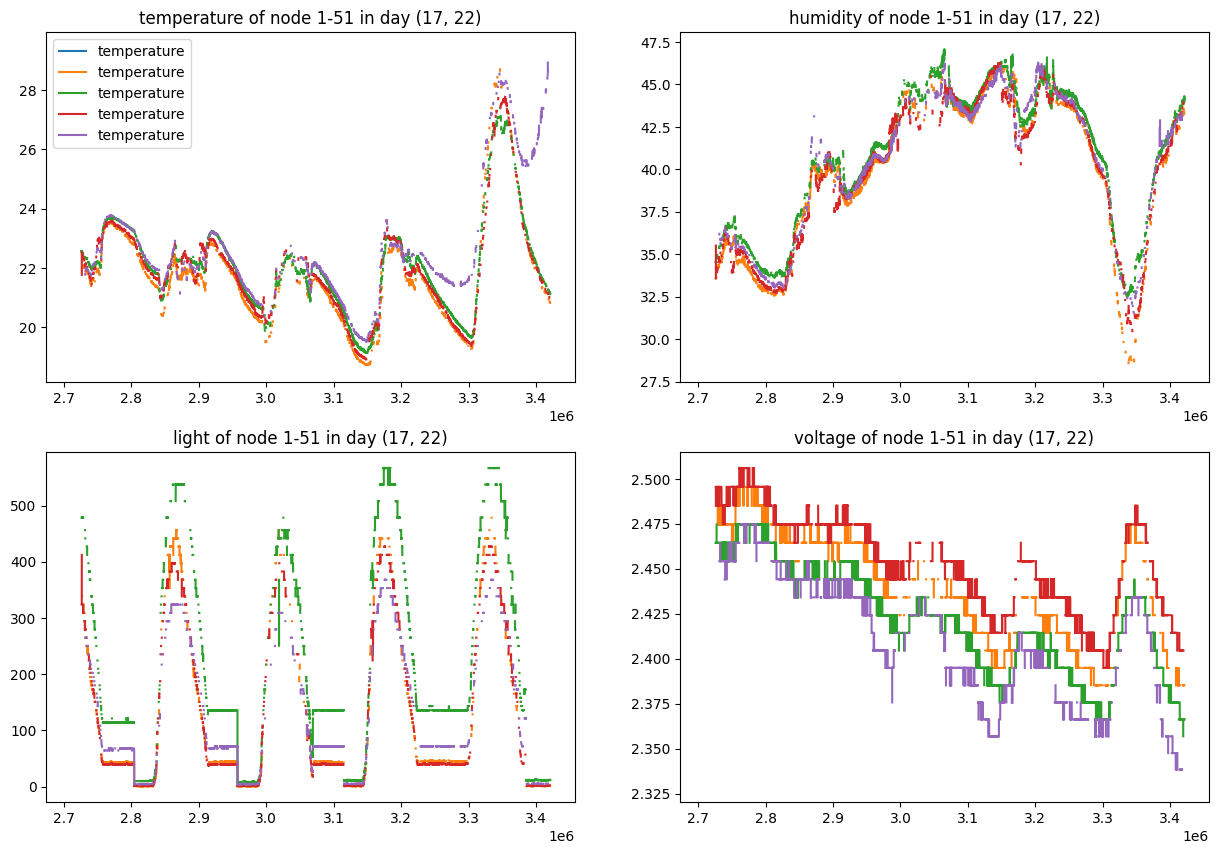

In [83]:
# 4 subplots (2,2)
fig, ax = plt.subplots(2,2, figsize=(15,10))
# plot temperature
for node in range(5):
    df_node = df_day[df_day['nodeid']==node]
    df_node['temperature'].plot(ax=ax[0,0],legend=f'{node}')
    df_node['humidity'].plot(ax=ax[0,1])
    df_node['light'].plot(ax=ax[1,0])
    df_node['voltage'].plot(ax=ax[1,1])
    ax[0,0].set_title(f'temperature of node 1-51 in day {START_DAY, END_DAY}')
    ax[0,1].set_title(f'humidity of node 1-51 in day {START_DAY, END_DAY}')
    ax[1,0].set_title(f'light of node 1-51 in day {START_DAY, END_DAY}')
    ax[1,1].set_title(f'voltage of node 1-51 in day {START_DAY, END_DAY}')
    
plt.show()

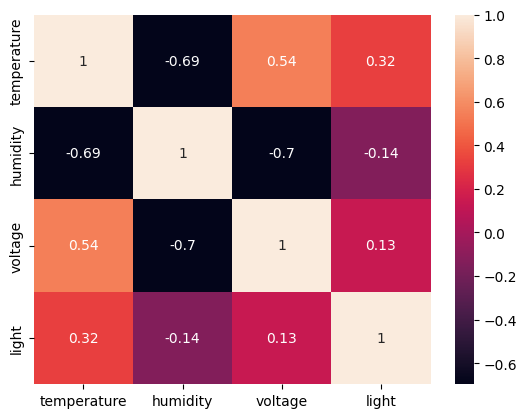

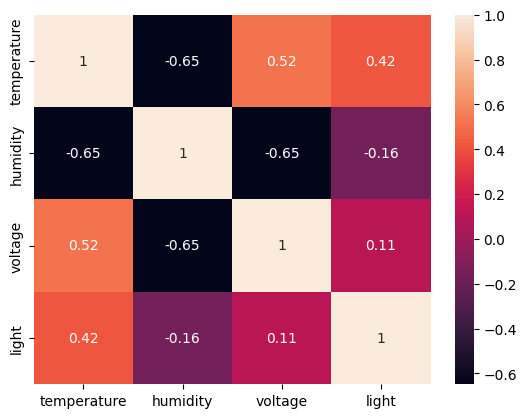

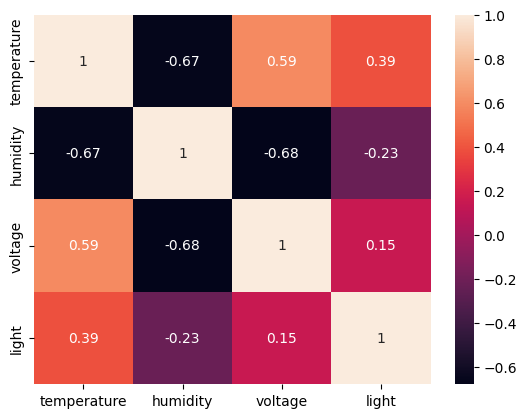

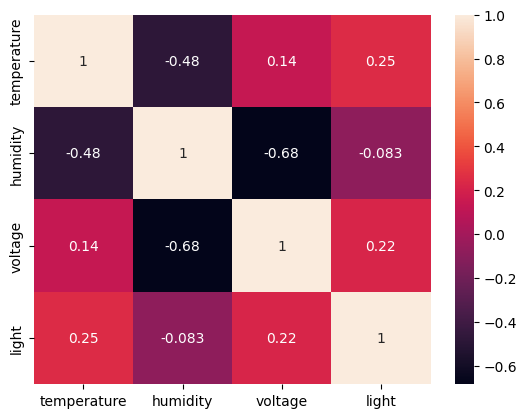

In [78]:
for node in range(1,5):
    df_node=df_day[df_day['nodeid']==node].dropna()
    # plot the correlation
    sns.heatmap(df_node[['temperature','humidity','voltage','light']].corr(method='pearson'), annot=True)
    plt.show()